In [1]:
import opensmile
import audiofile
import matplotlib.pyplot as plt
import numpy as np

In [2]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
)

speaker_a = smile.process_file('./Data/Train_DE_03_trimmed_long.wav')
speaker_b = smile.process_file('./Data/Train_DE_23_trimmed_long.wav')

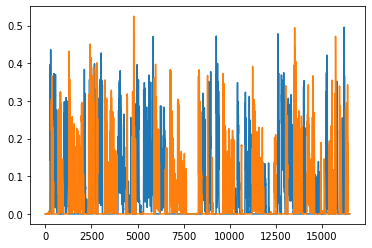

In [4]:
plt.plot(speaker_a['pcm_RMSenergy_sma'].values) #pcm_RMSenergy_sma
plt.plot(speaker_b['pcm_RMSenergy_sma'].values)

In [5]:
speaker_a.columns

Index(['F0final_sma', 'voicingFinalUnclipped_sma', 'jitterLocal_sma',
       'jitterDDP_sma', 'shimmerLocal_sma', 'logHNR_sma',
       'audspec_lengthL1norm_sma', 'audspecRasta_lengthL1norm_sma',
       'pcm_RMSenergy_sma', 'pcm_zcr_sma', 'audSpec_Rfilt_sma[0]',
       'audSpec_Rfilt_sma[1]', 'audSpec_Rfilt_sma[2]', 'audSpec_Rfilt_sma[3]',
       'audSpec_Rfilt_sma[4]', 'audSpec_Rfilt_sma[5]', 'audSpec_Rfilt_sma[6]',
       'audSpec_Rfilt_sma[7]', 'audSpec_Rfilt_sma[8]', 'audSpec_Rfilt_sma[9]',
       'audSpec_Rfilt_sma[10]', 'audSpec_Rfilt_sma[11]',
       'audSpec_Rfilt_sma[12]', 'audSpec_Rfilt_sma[13]',
       'audSpec_Rfilt_sma[14]', 'audSpec_Rfilt_sma[15]',
       'audSpec_Rfilt_sma[16]', 'audSpec_Rfilt_sma[17]',
       'audSpec_Rfilt_sma[18]', 'audSpec_Rfilt_sma[19]',
       'audSpec_Rfilt_sma[20]', 'audSpec_Rfilt_sma[21]',
       'audSpec_Rfilt_sma[22]', 'audSpec_Rfilt_sma[23]',
       'audSpec_Rfilt_sma[24]', 'audSpec_Rfilt_sma[25]',
       'pcm_fftMag_fband250-650_sma', 'pcm_f

In [6]:
speaker_a

F0final_sma  \
file                                start                  end                                   
./Data/Train_DE_03_trimmed_long.wav 0 days 00:00:00        0 days 00:00:00.060000          0.0   
                                    0 days 00:00:00.010000 0 days 00:00:00.070000          0.0   
                                    0 days 00:00:00.020000 0 days 00:00:00.080000          0.0   
                                    0 days 00:00:00.030000 0 days 00:00:00.090000          0.0   
                                    0 days 00:00:00.040000 0 days 00:00:00.100000          0.0   
...                                                                                        ...   
                                    0 days 00:02:44.910000 0 days 00:02:44.970000          0.0   
                                    0 days 00:02:44.920000 0 days 00:02:44.980000          0.0   
                                    0 days 00:02:44.930000 0 days 00:02:44.990000          0.0   
                                    0 days 00:02:44.940000 0 days 00:02:45                 0.0   
                                                           0 days 00:02:45                 0.0   

                                                                                   voicingFinalUnclipped_sma  \
file                                start                  end                                                 
./Data/Train_DE_03_trimmed_long.wav 0 days 00:00:00        0 days 00:00:00.060000                        0.0   
                                    0 days 00:00:00.010000 0 days 00:00:00.070000                        0.0   
                                    0 days 00:00:00.020000 0 days 00:00:00.080000                        0.0   
                                    0 days 00:00:00.030000 0 days 00:00:00.090000                        0.0   
                                    0 days 00:00:00.040000 0 days 00:00:00.100000                        0.0   
...                                                                                                      ...   
                                    0 days 00:02:44.910000 0 days 00:02:44.970000                        0.0   
                                    0 days 00:02:44.920000 0 days 00:02:44.980000                        0.0   
                                    0 days 00:02:44.930000 0 days 00:02:44.990000                        0.0   
                                    0 days 00:02:44.940000 0 days 00:02:45                               0.0   
                                                           0 days 00:02:45                               0.0   

                                                                                   jitterLocal_sma  \
file                                start                  end                                       
./Data/Train_DE_03_trimmed_long.wav 0 days 00:00:00        0 days 00:00:00.060000              0.0   
                                    0 days 00:00:00.010000 0 days 00:00:00.070000              0.0   
                                    0 days 00:00:00.020000 0 days 00:00:00.080000              0.0   
                                    0 days 00:00:00.030000 0 days 00:00:00.090000              0.0   
                                    0 days 00:00:00.040000 0 days 00:00:00.100000              0.0   
...                                                                                            ...   
                                    0 days 00:02:44.910000 0 days 00:02:44.970000              0.0   
                                    0 days 00:02:44.920000 0 days 00:02:44.980000              0.0   
                                    0 days 00:02:44.930000 0 days 00:02:44.990000              0.0   
                                    0 days 00:02:44.940000 0 days 00:02:45                     0.0   
                                                           0 days 00:02:45                     0.0   

                        

In [7]:
ctr = 0
current_sum_energy = 0
current_mean_energy = 0
mean_energy = []

for i in range(len(speaker_a)):
    value = speaker_a.iloc[i]['pcm_RMSenergy_sma']
    if value > 0.05:
        ctr += 1
        current_sum_energy += value
        current_mean_energy = current_sum_energy / ctr
        mean_energy.append(current_mean_energy)
    else: 
        mean_energy.append(current_mean_energy)

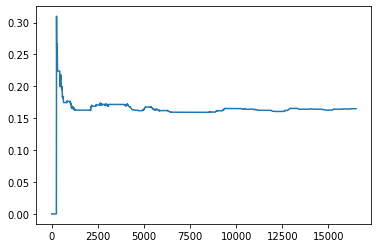

In [8]:
plt.plot(mean_energy)

In [9]:
ctr = 0
current_sum_energy = 0
current_mean_energy = 0
mean_energy2 = []

for i in range(len(speaker_b)):
    value = speaker_b.iloc[i]['pcm_RMSenergy_sma']
    if value > 0.05:
        ctr += 1
        current_sum_energy += value
        current_mean_energy = current_sum_energy / ctr
        mean_energy2.append(current_mean_energy)
    else: 
        mean_energy2.append(current_mean_energy)

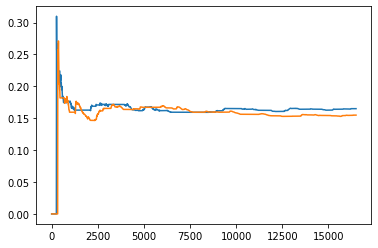

In [10]:
plt.plot(mean_energy)
plt.plot(mean_energy2)
mean3 = np.array(mean_energy) - np.array(mean_energy2)

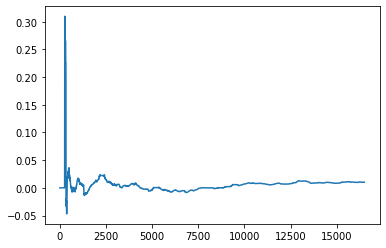

In [11]:
plt.plot(mean3)

In [12]:
ctr = 0
current_sum_energy = 0
current_mean_energy = 0
mean_energy_test = []

for i in range(len(speaker_a)):
    value = speaker_a.iloc[i]['pcm_RMSenergy_sma']
    if value > 0.05:
        ctr += 1
        current_sum_energy += value
        current_mean_energy = current_sum_energy / ctr
        mean_energy_test.append(current_mean_energy)

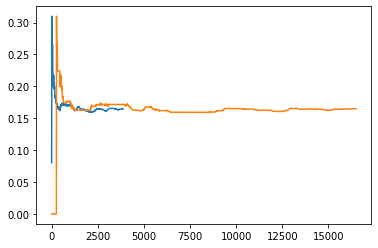

In [13]:
plt.plot(mean_energy_test)
plt.plot(mean_energy)

In [14]:
ctr = 0
current_sum_energy = 0
current_mean_energy = 0
mean_energy_test2 = []

for i in range(len(speaker_b)):
    value = speaker_b.iloc[i]['pcm_RMSenergy_sma']
    if value > 0.05:
        ctr += 1
        current_sum_energy += value
        current_mean_energy = current_sum_energy / ctr
        mean_energy_test2.append(current_mean_energy)

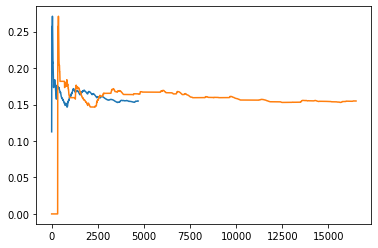

In [15]:
plt.plot(mean_energy_test2)
plt.plot(mean_energy2)

# Intervals

In [16]:
ctr = 0
current_sum_energy = 0
current_mean_energy = 0
mean_energy_intervala = []
stop = 15

for i in range(len(speaker_a)):
    if i%stop == 0: 
        _discard = False
        interval = speaker_a.iloc[i:i+stop]['F0final_sma'] # pcm_RMSenergy_sma F0final_sma
        for value in interval:
            if value < 0.05:
                _discard = True
                break
        
        if _discard:
            mean_energy_intervala.append(current_mean_energy)
            continue
        
        current_mean_energy = np.mean(interval)

        mean_energy_intervala.append(current_mean_energy)
        

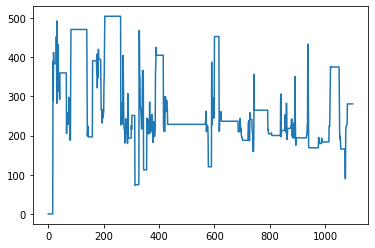

In [17]:
plt.plot(mean_energy_intervala)

In [18]:
ctr = 0
current_sum_energy = 0
current_mean_energy = 0
mean_energy_intervalb = []
stop = 15

for i in range(len(speaker_b)):
    if i%stop == 0:
        _discard = False
        interval = speaker_b.iloc[i:i+stop]['F0final_sma']
        for value in interval:
            if value < 0.05:
                _discard = True
                break
        
        if _discard:
            mean_energy_intervalb.append(current_mean_energy)
            continue
        
        current_mean_energy = np.mean(interval)

        mean_energy_intervalb.append(current_mean_energy)

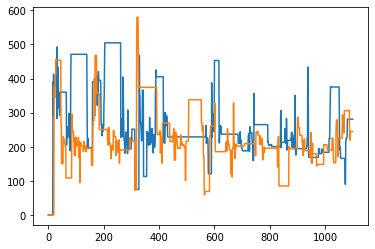

In [19]:
plt.plot(mean_energy_intervala)
plt.plot(mean_energy_intervalb)

In [20]:
mean_energy_intervalb = mean_energy_intervalb[:len(mean_energy_intervala)]

In [21]:
mean_energy_intervalc = np.array(mean_energy_intervala) - np.array(mean_energy_intervalb)

In [22]:
#plt.plot(mean_energy_intervalc)
len(mean_energy_intervalc)

1100

In [23]:
def visualize_live_curve(data):
    plt.axis([0, 1120, -150, 150])

    for i in range(len(data)):
        plt.axis([0, 700, -0.5, 0.5])
        plt.plot(data[:i])
        plt.pause(0.15)

    plt.show()

In [24]:
#visualize_live_curve(mean_energy_intervalc)

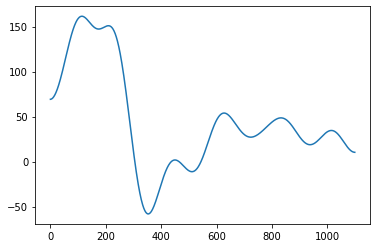

In [25]:
from scipy.ndimage.filters import gaussian_filter1d


ysmoothed = gaussian_filter1d(mean_energy_intervalc, sigma=50)
plt.plot(range(len(mean_energy_intervalc)), ysmoothed)

In [26]:
ysmoothed

array([69.21456379, 69.25122684, 69.32442764, ..., 10.32412661,
       10.28900851, 10.27131491])

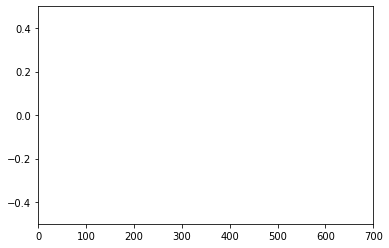

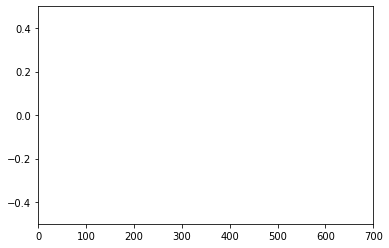

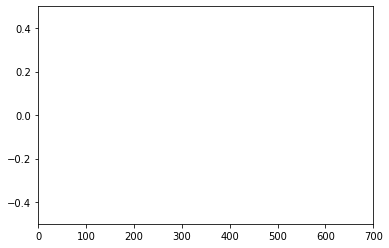

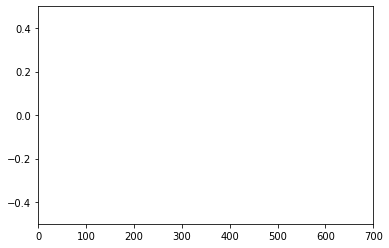

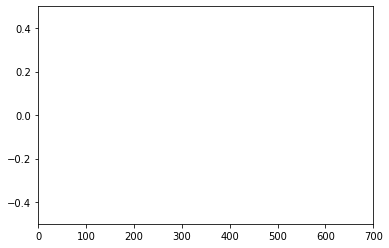

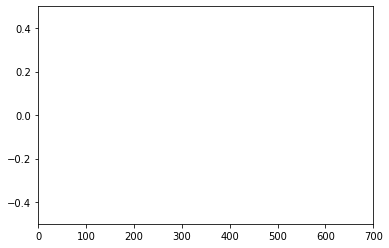

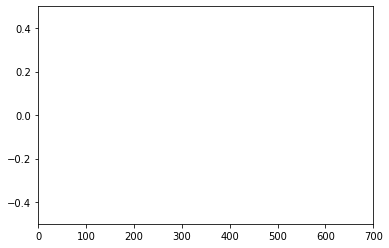

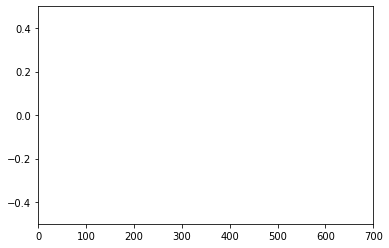

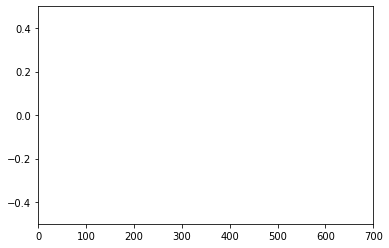

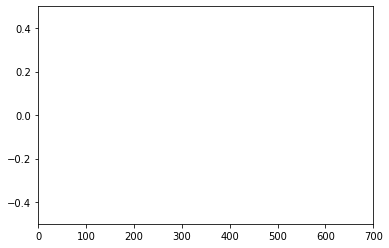

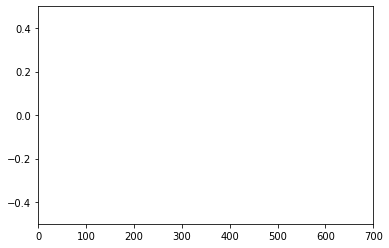

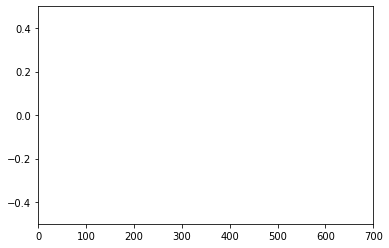

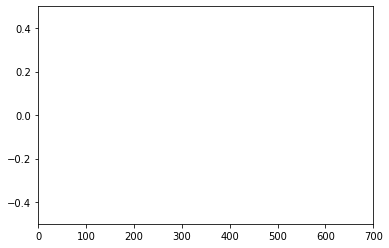

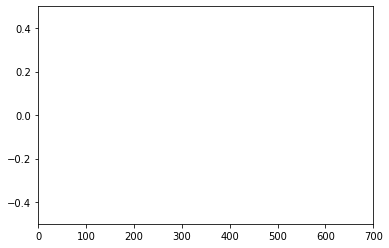

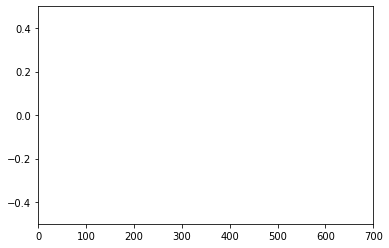

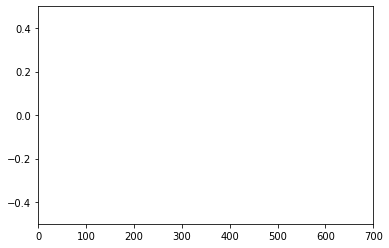

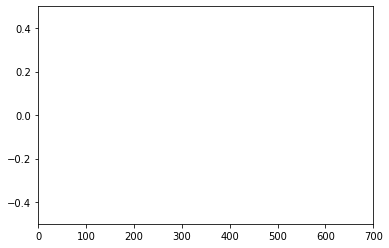

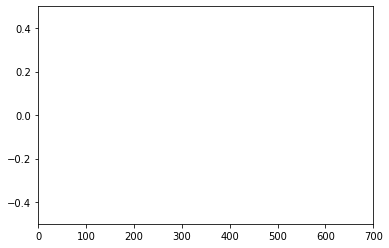

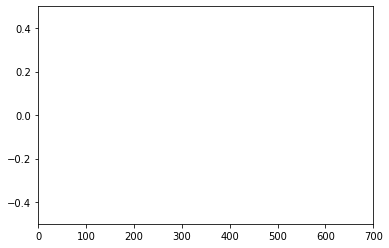

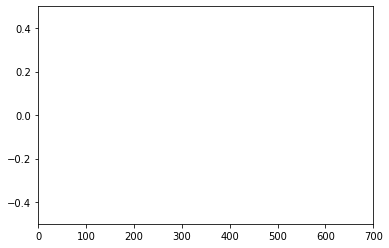

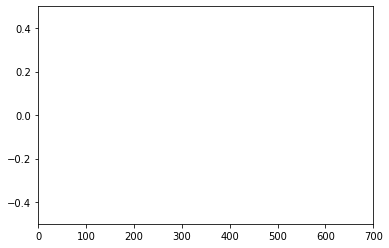

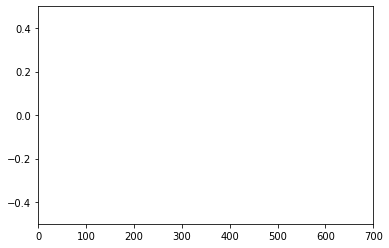

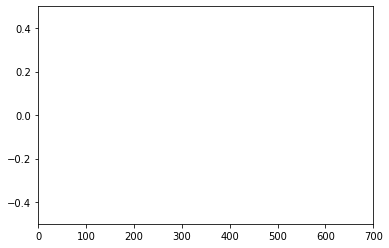

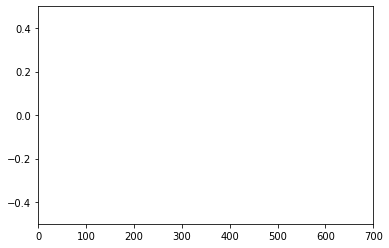

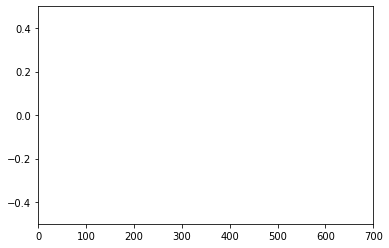

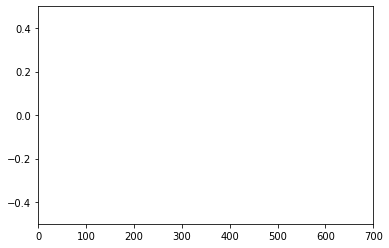

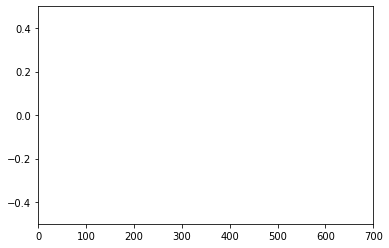

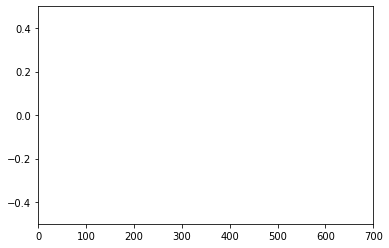

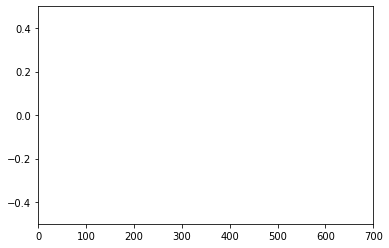

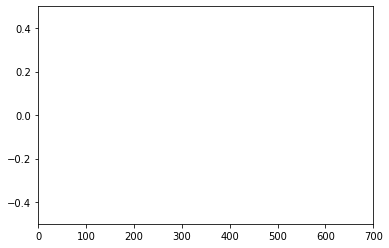

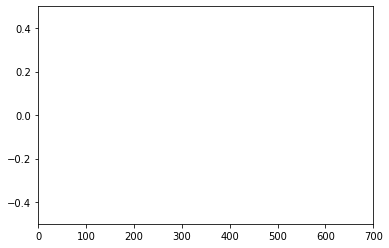

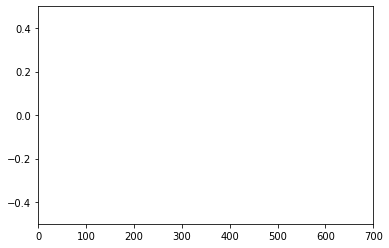

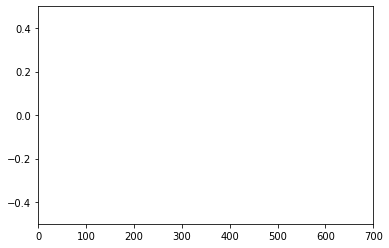

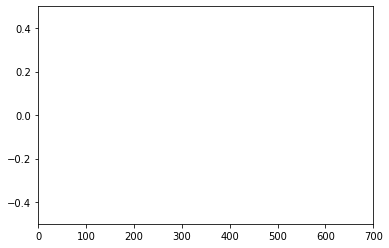

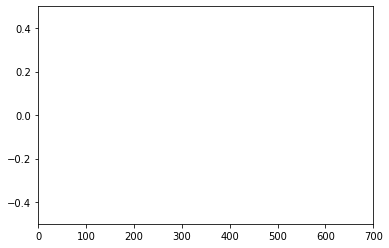

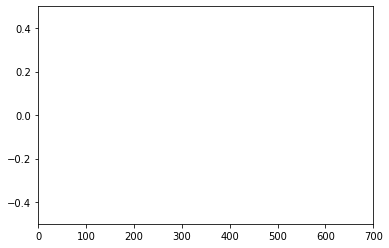

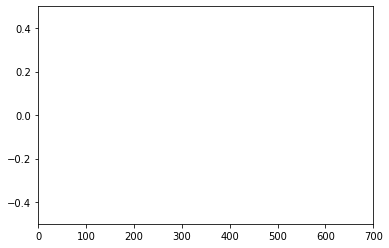

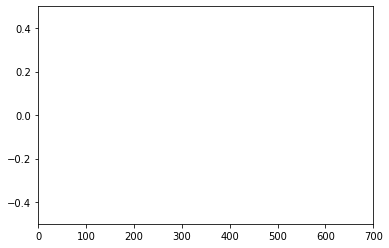

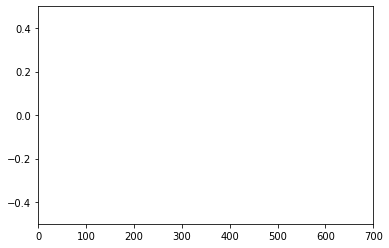

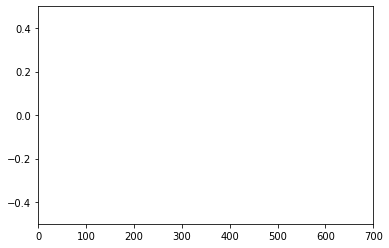

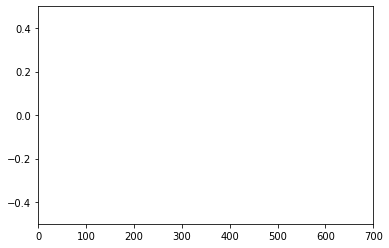

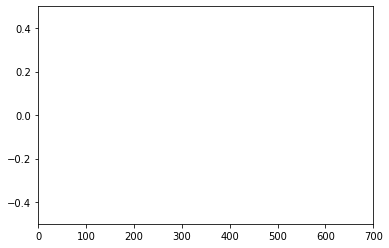

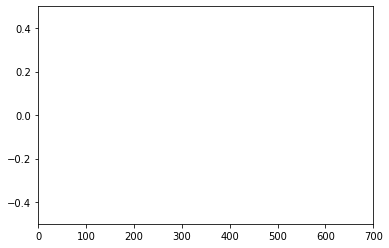

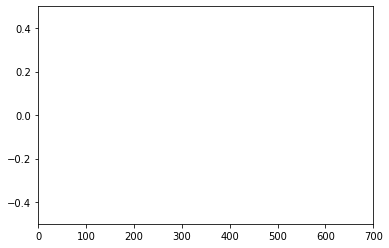

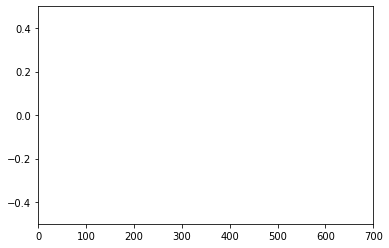

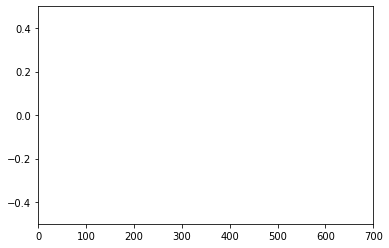

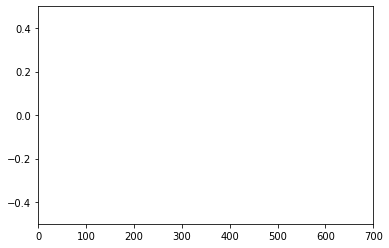

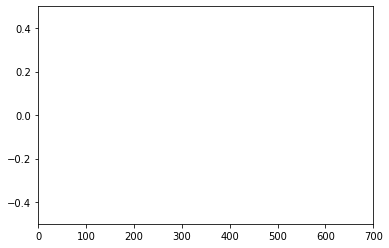

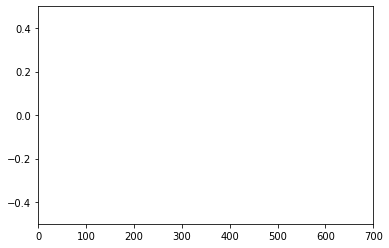

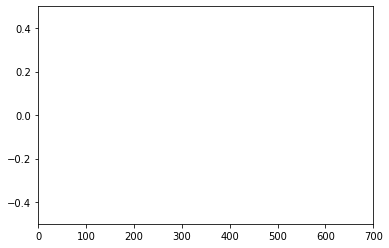

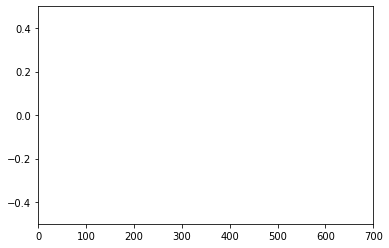

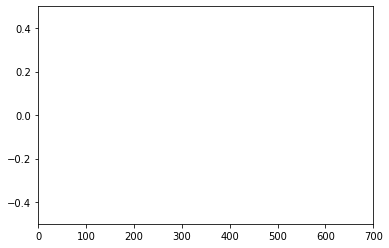

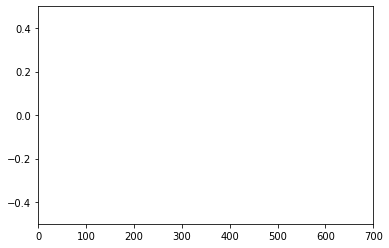

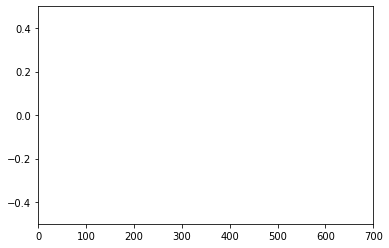

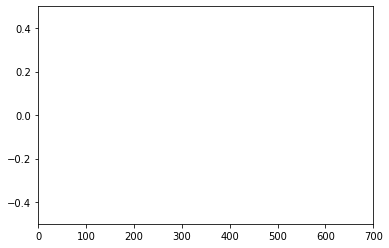

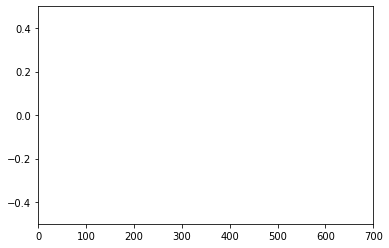

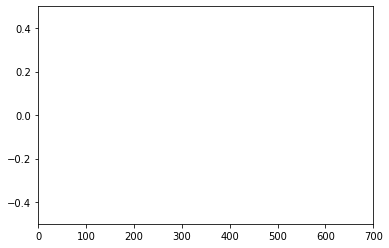

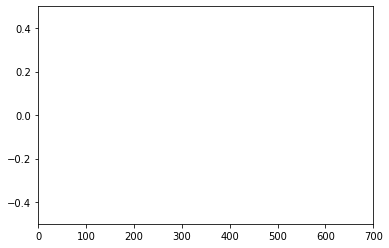

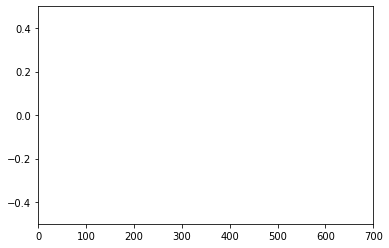

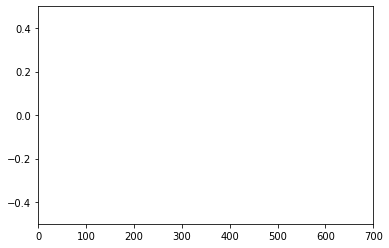

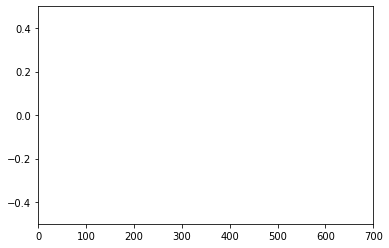

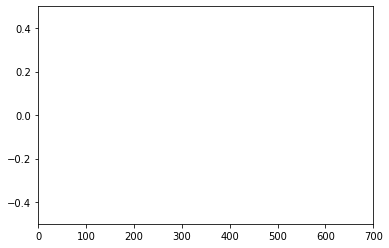

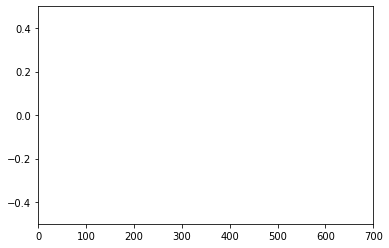

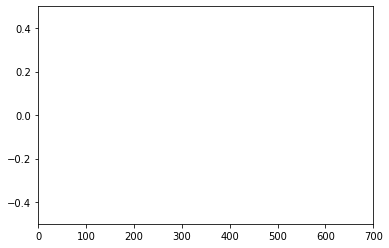

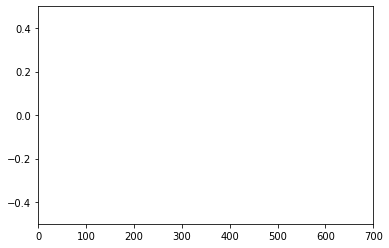

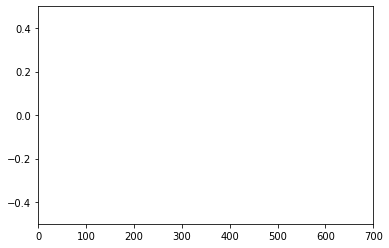

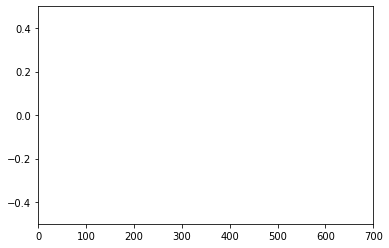

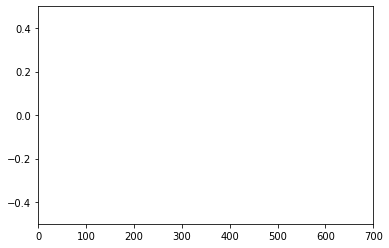

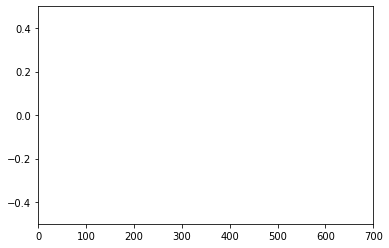

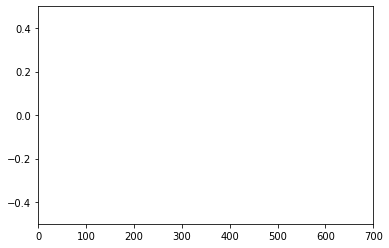

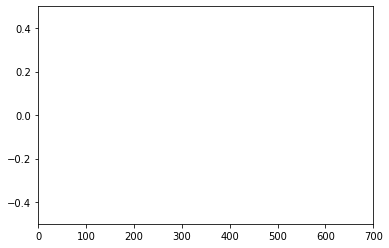

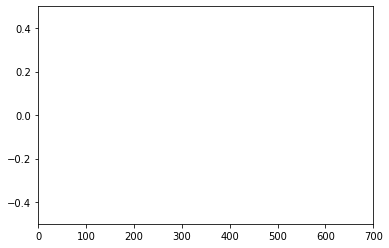

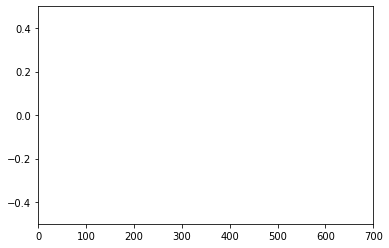

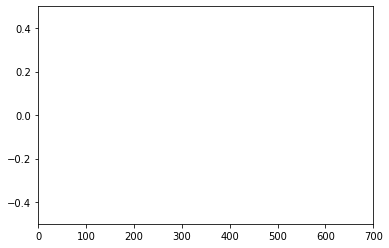

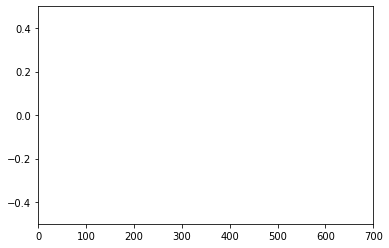

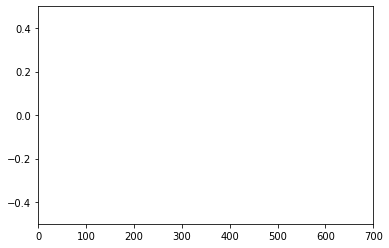

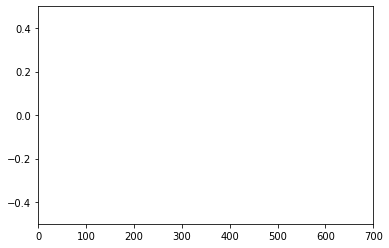

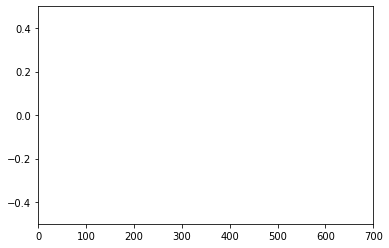

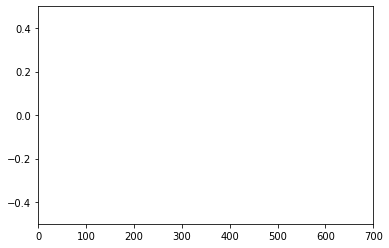

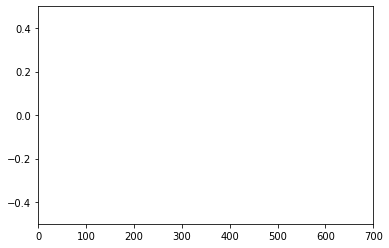

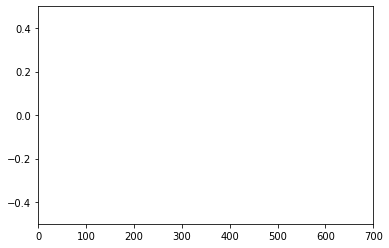

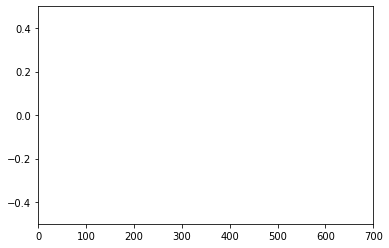

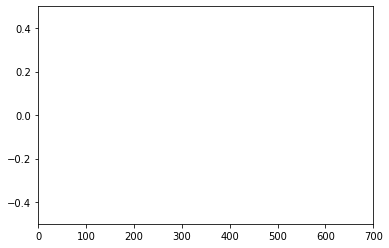

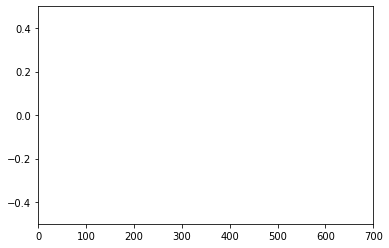

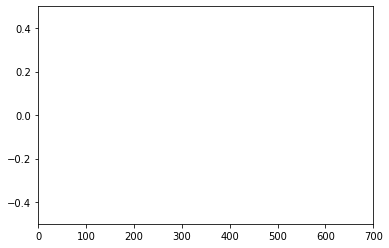

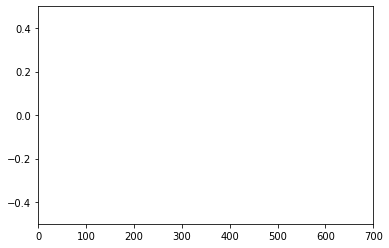

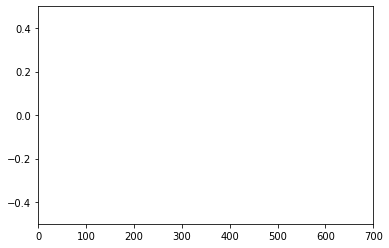

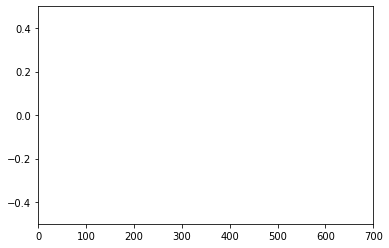

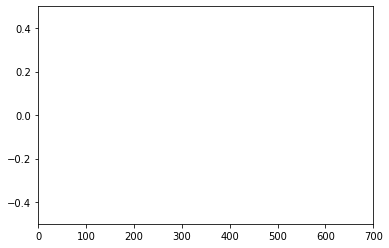

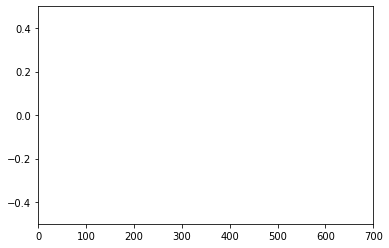

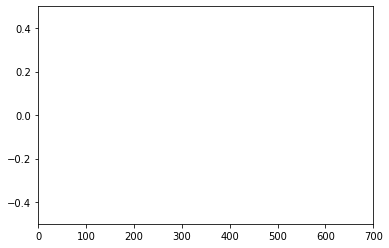

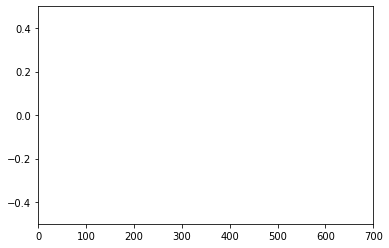

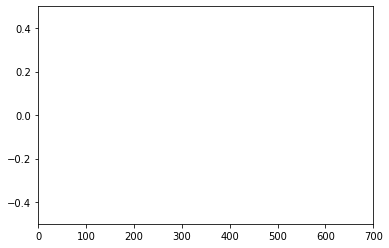

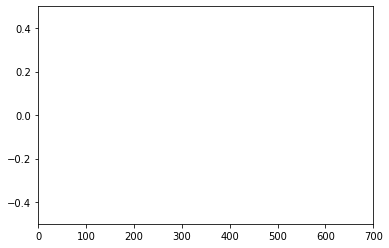

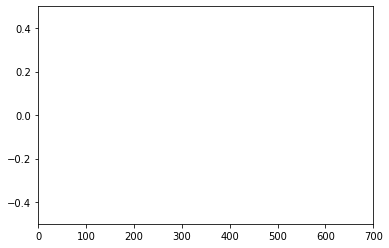

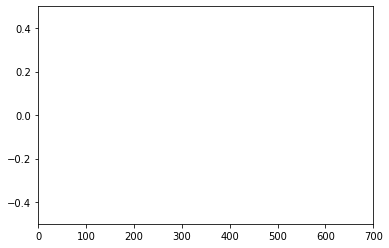

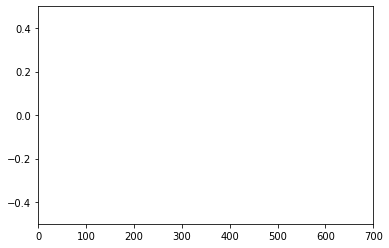

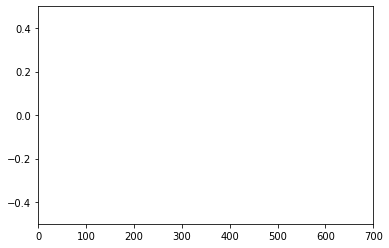

KeyboardInterrupt: 

In [25]:
visualize_live_curve(ysmoothed)